# IMPORTING THE RELEVANT LIBRARIES

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# IMPORTING THE DATASET

In [168]:
#change the directories in order to proceed futher as this program was built in an offline notebook

train=pd.read_csv(r'C:\Users\Sarkaari\Desktop\home_data\train.csv')
test=pd.read_csv(r'C:\Users\Sarkaari\Desktop\home_data\test.csv')


### Headers of the TRAIN DATASET

In [169]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [170]:
train.shape

(1460, 81)

# Demo Data visualization( just to get a birds view of what is going on )

In [171]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

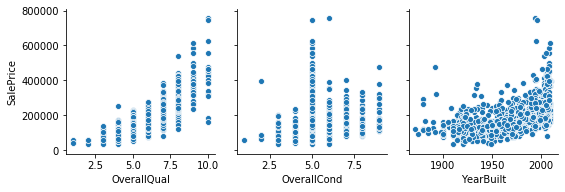

In [172]:
sns.pairplot(data=train,
                  y_vars=['SalePrice'],
                  x_vars=['OverallQual', 'OverallCond', 'YearBuilt'])


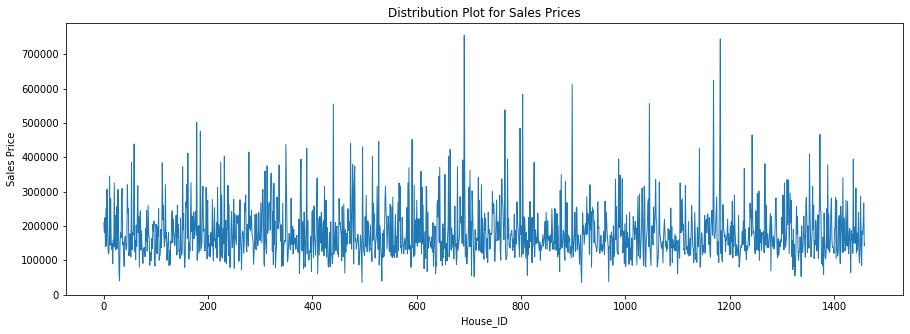

In [173]:
plt.figure(figsize=(15,5))
plt.plot(train.SalePrice,linewidth=1)
plt.title('Distribution Plot for Sales Prices')
plt.ylabel('Sales Price');
plt.xlabel('House_ID');

# Data Cleaning (NULL VALUES IMPUTATION)

In [174]:
train.isnull().sum().sort_values(ascending=False)[0:25]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

### The first zero appears in 19th position so we view the null values till 19th pos.

In [175]:
train.isnull().sum().sort_values(ascending=False)[0:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [176]:
test.isnull().sum().sort_values(ascending=False)[0:45]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
BldgType           0
Condition1         0
Condition2         0
dtype: int64

### The first zero appears in 19th position so we view the null values till 33rd pos.

In [177]:
test.isnull().sum().sort_values(ascending=False)[0:33]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [178]:
print(train.shape)
print(test.shape)



(1460, 81)
(1459, 80)


## Looking into features individually

### Dropping columns with more than 1100 missing values

In [180]:
list1 = ['Id','Alley','GarageYrBlt','PoolQC', 'Fence', 'MiscFeature']

train.drop(['Id','Alley','GarageYrBlt','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Id','Alley','GarageYrBlt','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)



In [181]:
y_train=train['SalePrice']


### Now for remaining columns ,

### *Columns with less missing values are replaced with their mean*
### *whereas the rest are filled with the mode*

In [182]:
columns = ['BsmtFinType1', 'Utilities','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 
           'Exterior1st', 'KitchenQual','MSZoning','FireplaceQu', 'LotFrontage', 'GarageFinish','GarageType',
           'GarageCond','GarageQual','BsmtExposure', 'BsmtFinType2','BsmtCond','BsmtQual','MasVnrType',
           'MasVnrArea','Electrical']
columns1 = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for item in columns:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(test[item].mode()[0])
for item in columns1:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(test[item].mean())

In [183]:
print(train.shape)
print(test.shape)

(1460, 75)
(1459, 74)


#  OUR DATA IS NOW FREE OF N/A or NULL VALUES

# Feature Engineering using One Hot encoding


In [184]:

train.isnull().any().any()


False

In [185]:
columns = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
len(columns)

39

In [186]:
final_df = pd.concat([train, test], axis=0)


In [187]:
final_df.shape

(2919, 75)

In [188]:
#A function that encodes categorical features
def One_hot_encoding(columns):
    df_final=final_df
    i=0
    for fields in columns:
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [191]:
final_df = One_hot_encoding(columns)

In [192]:
final_df.shape

(2919, 236)

In [193]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [194]:
final_df.shape

(2919, 176)

Separating data as it was


In [199]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [200]:

df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [202]:
X_train_final=df_Train.drop(['SalePrice'],axis=1)
y_train_final=df_Train['SalePrice']

# PCA(Principle component analysis)

In [203]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train_final)

my_columns = X_train_final.columns
new_df = pd.DataFrame(X_std, columns=my_columns)

In [204]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(new_df)

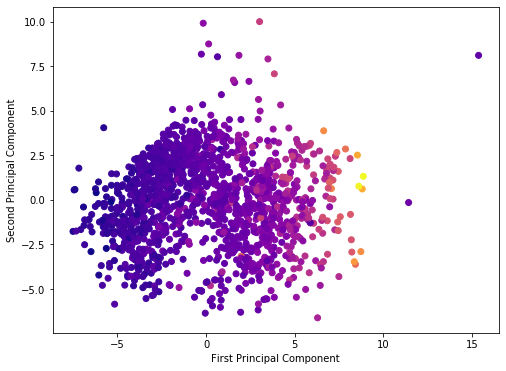

In [205]:
plt.figure(figsize =(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = y_train_final, cmap ='plasma')
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

# Splitting data

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#splitting the dataset as training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train_final)


# FEATURE NORMALIZATION

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Creation [USING Random Forest and Random CV]

In [220]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()

In [221]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 900]
criterion = ['gini', 'entropy']
depth = [3,5,10,15]
min_split=[2,3,4]
min_leaf=[2,3,4]
bootstrap = ['True', 'False']
verbose = [5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'criterion':criterion,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, 
                               return_train_score = True,
                               random_state=42)

In [222]:
random_cv.fit(X_train_final,y_train_final)

D:\python\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   15.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [223]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=5, warm_start=False)

In [224]:
regressor=RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=5, warm_start=False)

In [225]:
regressor.fit(X_train_final,y_train_final)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   15.3s finished


RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=5, warm_start=False)

In [226]:
y_pred = regressor.predict(df_Test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.6s finished


In [227]:

y_pred

array([110000., 155000., 173000., ..., 168000.,  93500., 250000.])

# Data Frame building for final Output

In [231]:
pred=pd.DataFrame(y_pred)
samp = pd.read_csv(r'C:\Users\Sarkaari\Desktop\home_data\test.csv')
sub = pd.concat([samp['Id'],pred], axis=1)
sub.columns=['Id','SalePrice']

In [232]:
sub

,Id,SalePrice
0,1461,110000.0
1,1462,155000.0
2,1463,173000.0
3,1464,181000.0
4,1465,153900.0
...,...,...
1454,2915,75000.0
1455,2916,88000.0
1456,2917,168000.0
1457,2918,93500.0
